In [12]:
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import geopandas as gpd
import numpy as np
import gtfs_kit as gk

from shapely import geometry


%matplotlib inline
ox.config(log_console=True)
ox.__version__

data_dir = '../data/'

In [10]:
feed=gk.read_feed('data/stm.zip',dist_units='km')

In [25]:
trip = feed.stop_times[feed.stop_times['trip_id']=='205408909']

In [29]:
trip=trip.merge(feed.stops[['stop_id','stop_lat','stop_lon']],left_on='stop_id',right_on='stop_id')

In [39]:
meili_df = trip[['departure_time','stop_lat','stop_lon']]

In [40]:
meili_df

,departure_time,stop_lat,stop_lon
0,05:13:00,45.530024,-73.623756
1,05:14:51,45.529510,-73.622634
2,05:16:12,45.532296,-73.620360
3,05:17:00,45.533908,-73.618877
4,05:17:15,45.535046,-73.617454
5,05:17:42,45.537393,-73.615162
6,05:18:00,45.538922,-73.613838
7,05:18:48,45.540498,-73.613116
8,05:19:48,45.542320,-73.612026
9,05:20:39,45.543771,-73.610716


In [41]:
meili_coordinates = meili_df.to_json(orient='records')


In [42]:

# Providing needed data for the body of Meili's request
meili_head = '{"shape":'
# Those are parameters that you can change according to the Meili's documentation
meili_tail = ""","search_radius": 150, "shape_match":"map_snap", "costing":"auto", "format":"osrm"}"""

# Combining all the string into a single request
meili_request_body = meili_head + meili_coordinates + meili_tail

In [44]:
# The URL of our local Valhalla server
# "trace_route" means that we're sening a request to Meili
url = "<http://localhost:8889/trace_route>"

# Providing headers to the request
headers = {'Content-type': 'application/json'}

# We need to send our JSON as a string
data = str(meili_request_body)

# Sending a request
r = requests.post(url, data=data, headers=headers)

InvalidSchema: No connection adapters were found for '<http://localhost:8889/trace_route>'

In [6]:
import mapmatching

In [10]:
exec('mapmatching match')

SyntaxError: invalid syntax (<string>, line 1)

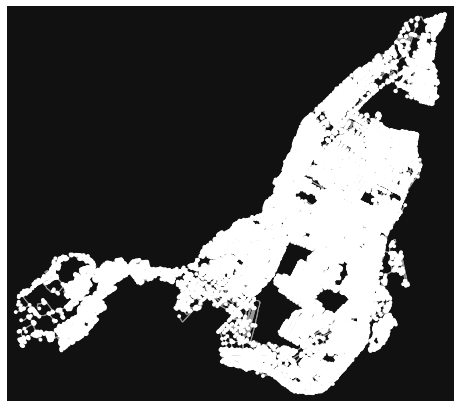

In [13]:
G = ox.graph_from_place('Montreal, Canada', network_type='drive_service')
fig, ax = ox.plot_graph(G)